<h1 align="center">Machine Learning</h1><h2 align="center" style="margin:10px">Assignment 3</h2>

Group 6:
    287040 Stephan Thierry
    254172 Kasper Holst Daugaard 


The assignments below should be solved and documented as a mini-project that will form the basis for the
examination. When solving the exercises it is important that you

  * document all relevant results and analyses that you have obtained/performed during the exercises
  * try to relate your results to the theoretical background of the methods being applied.

Feel free to add cells if you need to. The easiest way to convert to pdf is to save this notebook as .html (File-->Download as-->HTML) and then convert this html file to pdf. You can also export as pdf directly, but here you need to watch your margins as the converter will cut off your code (i.e. make vertical code!).

In [4]:
# Import all necessary libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import mglearn

# Exercise 1: Linear vs nonlinear classifiers

Below, we show a dataset that cannot be linearly separated. In this exercise, we will use the default parameters for all classifiers (except the custom SVM in exercise d).

In [5]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(1000, factor=0.0, noise=0.2)



a) Plot the dataset e.g. using the `discrete_scatter`-function from mglearn.

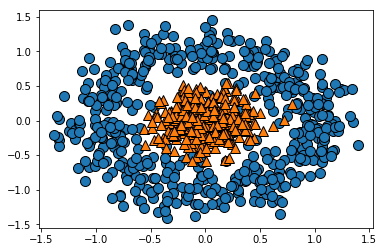

In [6]:
mglearn.discrete_scatter(X[:,0],X[:,1], y)


b) Split the dataset into train and test-sets.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

Here we could split using a random_state that demonstrates the outcome that we want to show (3). Other random_state's (4) will show a much lower accuracy - but knowing that data it should be about 50/50.

Instead we stratify on y so the data is split evenly and there is not an overrepresentation of one classification in either of the new datasets

We don't set "test_size" so we use the default split of 75/25.

c) Train a logistic regression on the dataset, and compute the classification accuracy. 

In [8]:
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression(solver='lbfgs')
##Logreg.fit(X_train,y_train)
Logreg.fit(X_train,y_train)
print (Logreg.predict_proba([X_test[0]]))
print (Logreg.predict_proba([X_test[10]]))
print (Logreg.predict_proba([X_test[100]]))

print("Accuracy on Training set is: {:.2f}".format(Logreg.score(X_train,y_train)))
print("Accuracy on Test set is: {:.2f}".format(Logreg.score(X_test,y_test)))

[[0.46015384 0.53984616]]
[[0.46152047 0.53847953]]
[[0.54156153 0.45843847]]
Accuracy on Training set is: 0.54
Accuracy on Test set is: 0.50


We train the model on the training set at test the accuracy on the test set. As expected it's around 50%.

d) Plot the decision boundary for the logistic regression (e.g. using the `plot_2d_separator`-function from mglearn), and use this to investigate why the algorithm does not give a good result in this case.

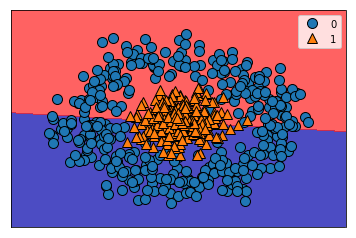

In [9]:
Logreg.fit(X_train,y_train)
from mglearn.plots import plot_2d_separator
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)
plt.plot(X_train[0,0],X_train[0,1],'k.')
plt.legend()
plot_2d_separator(Logreg, X_train, fill=True, eps=0.4, alpha=.7)




We can see the linier boundry in a 2d space will not accurately seperate the data. It's split down the middle so ~50/50 is the best we can hope for.

e) Think of a feature you could add to this dataset to make it linearly separable. 
Add this feature, retrain the logistic regression classifier, and compute the accuracy again. Comment on the result.

Since the data is a circle inside another circle, adding "distance to the center" as a feature would be useful to the liner (plane) seperation 

From using distance from scipy.spatial we calculate the euclidean distance to the center. The center is at 0,0 - but if it was not we could calculate is and change the center-variable accordingly

See code comments for details:

In [10]:
## Add distance as new feature

from scipy.spatial import distance
from sklearn.svm import LinearSVC

center = [0,0];
X2 = np.empty([0,3])

#We run through each row of X and add the distance as a feature in each row
for eachitem in X:
    # Calculate distance to center
    dist = distance.euclidean(center, eachitem)
    # Add (insert) the distance to the current row and add (vertical-stack) the result to the resultset: X2 
    X2 = np.vstack((X2,np.insert(eachitem, 2, dist)))

## print(X2)

# We do a new split so test and traing sets contain the new feature
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, stratify=y)

## We use the X_plot and y_plot vaiables so we can run the plot-code on both 
##  the full dataset and the training-set by only changing 2 lines

##X_plot = X2
##y_plot = y

X_plot = X2_train
y_plot = y2_train

Accuracy on training set: 0.98
Accuracy on test set: 0.98


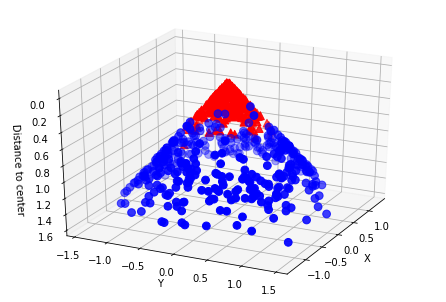

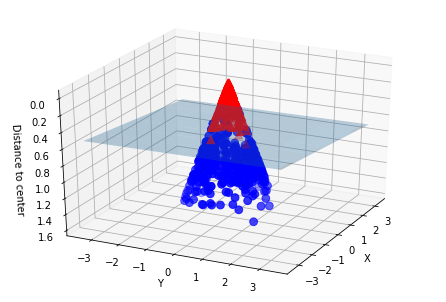

In [11]:

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y_plot == 0
ax.scatter(X_plot[mask, 0], X_plot[mask, 1], X_plot[mask, 2], c='b',
    cmap=mglearn.cm2, s=60)
ax.scatter(X_plot[~mask, 0], X_plot[~mask, 1], X_plot[~mask, 2], c='r', marker='^',
    cmap=mglearn.cm2, s=60)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Distance to center")

linear_3d = Logreg.fit(X_plot, y_plot)
coef, intercept = linear_3d.coef_.ravel(), linear_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_plot[:, 0].min() - 2, X_plot[:, 0].max() + 2, 50)
yy = np.linspace(X_plot[:, 1].min() - 2, X_plot[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_plot[mask, 0], X_plot[mask, 1], X_plot[mask, 2], c='b',
    cmap=mglearn.cm2, s=60)
ax.scatter(X_plot[~mask, 0], X_plot[~mask, 1], X_plot[~mask, 2], c='r', marker='^',
    cmap=mglearn.cm2, s=60)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Distance to center")

print('Accuracy on training set: {:.2f}'.format(linear_3d.score(X2_train, y2_train)))
print('Accuracy on test set: {:.2f}'.format(linear_3d.score(X2_test, y2_test)))


f) Now, return to the original dataset (without the extra feature), and train a kernelized SVM on the dataset. Compute the accuracy and plot the decision boundary. Compare to your previous results and discuss the differences.

Accuracy on training set: 0.98
Accuracy on test set: 0.97


Text(0, 0.5, 'Y')

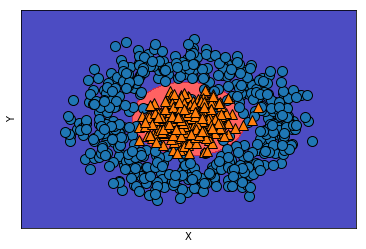

In [12]:
from sklearn.svm import SVC
svm = SVC(gamma='auto').fit(X_train,y_train)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

##fig, axes = plt.subplots(figsize=(10, 3))

plot_2d_separator(svm, X, fill=True, eps=0.5, alpha=.7 )
##plt.figure(figsize=(20,20))
print("Accuracy on training set: {:.2f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svm.score(X_test, y_test)))
plt.xlabel("X")
plt.ylabel("Y")



The kernelized SVM does not rely on a liniear seperation of the data, so we don't need to move into a higher dimintion to achive accurate seperation.



Accuracy on training set: 0.99
Accuracy on test set: 0.97


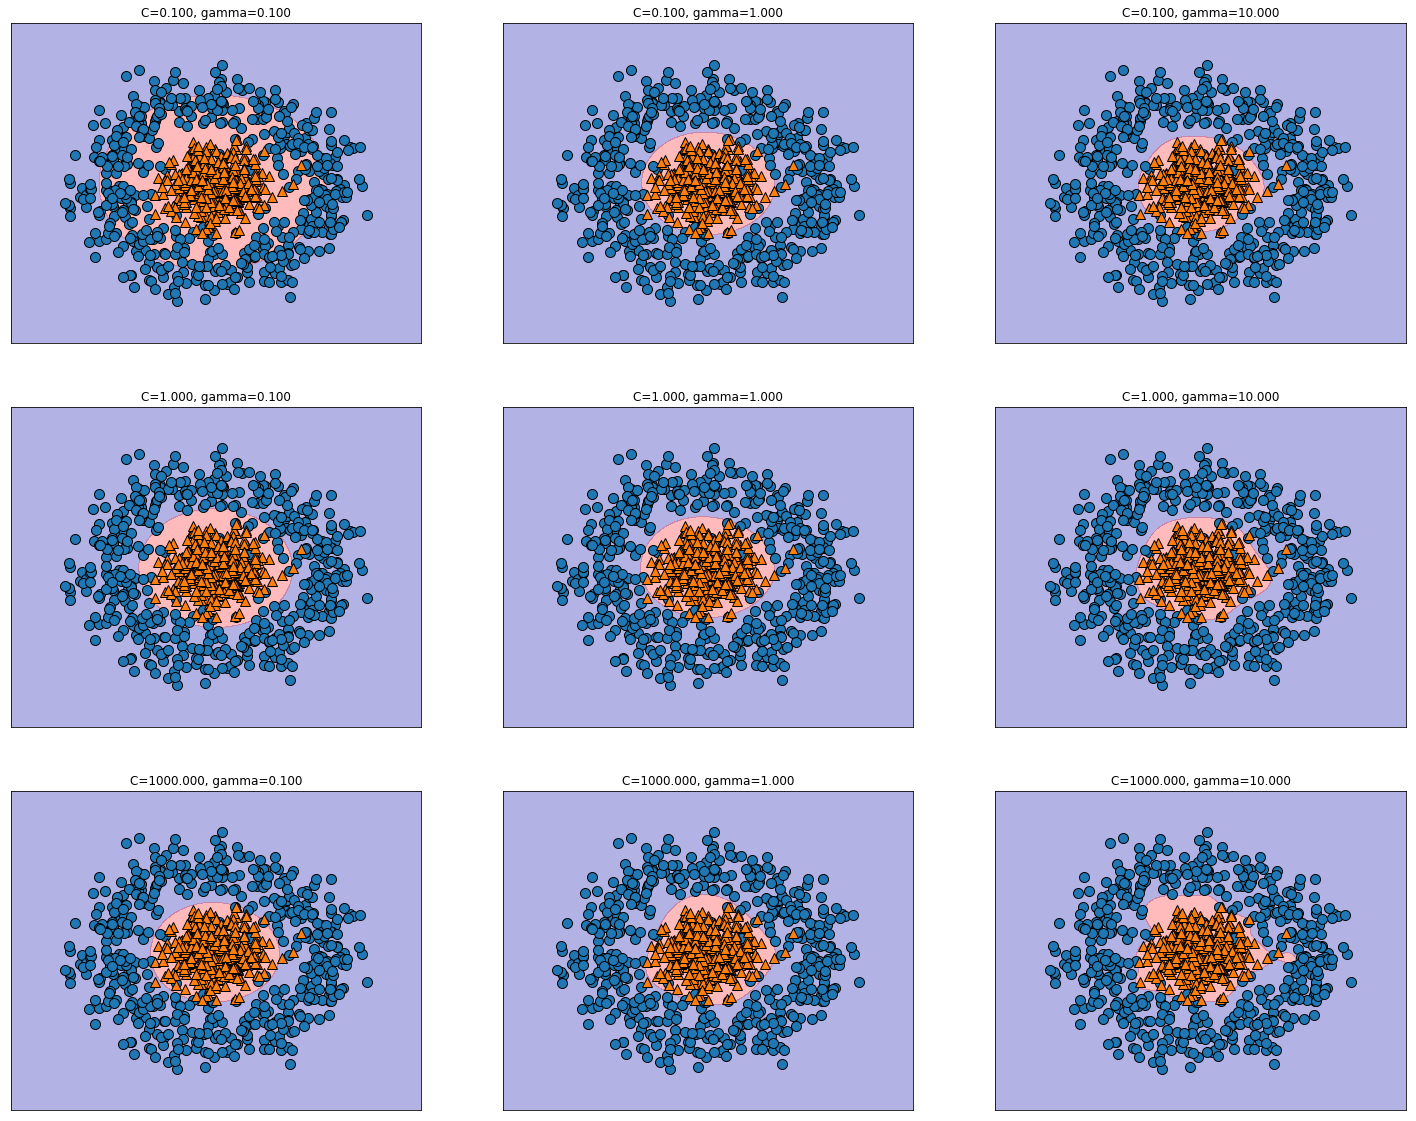

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(25,20))

for ax, C in zip(axes, [0.1, 1, 1000]):
    for a, gamma in zip(ax,[0.1, 1, 10]):
        svm = SVC(C=C, gamma=gamma).fit(X,y)
        mglearn.discrete_scatter(X[:,0],X[:,1], y, ax=a)
        mglearn.plots.plot_2d_separator(svm, X, eps=.5, fill=True, alpha=0.3, ax=a)
        a.set_title("C={:.3f}, gamma={:.3f}".format(C,gamma))
        
svm.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svm.score(X_test, y_test)))

# Exercise 2: MNIST

In [14]:
print(axes);

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002F237997588>


In this exercise, we consider the famous MNIST dataset, which is loaded below. The part of the dataset loaded as `testX` and `testY` will be reserved for testing - i.e. these cannot be used at all during training. 

It might be a good idea to only use part of the dataset (`X` and `Y`) while tuning parameters (in order to reduce the training-time).

In [62]:
import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data()

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


The code-snippet below can be used to see the digits corresponding to individual digits:

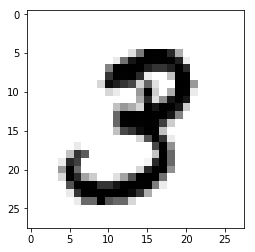

In [18]:
import matplotlib.pyplot as plt
index = 1

plt.imshow(X[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

a) Split the training data into a training and a validation set.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, Y, stratify=Y)

### Binary classification

b) To begin with, in order to make things a little bit simpler (and faster!), extract from the data a binary subset, that only contains the data for two selected digits:

In [63]:
import numpy as np

## Take two digits 5 and 2

reducedIndexes = np.isin(y, [2,5])
X_subset, y_subset = X[reducedIndexes], y[reducedIndexes]


X_train, X_validation, y_train, y_validation = train_test_split(X_subset, y_subset, stratify=Y)

print(y_train.size) # 41250 elements
print(y_train_subset.size) # reduced to 7843 elements (if we dont use the "break")

plt.imshow(X_train_subset[0].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 55000 but corresponding boolean dimension is 1000

c) Learn different SVM models by varying the kernel function. For each configuration,
determine the time it takes to learn the model, and the accuracy on the validation data. *Caution*: for some
configurations, learning here can take a little while (several minutes).

In [35]:
#It must be one of ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
X_train, X_test, y_train, y_test = train_test_split(X_train_subset, y_train_subset, stratify=y_train_subset)

import mglearn
import time
numberList = [1, 2, 3]
kernelList = [1, 2, 3, 4]

for C in [0.1, 1, 1000]:
    for gamma in [0.1, 1, 10]:
        for kernel in ['poly','rbf','sigmoid']:
            start = time.time()
            svm = SVC(C=C, gamma=gamma, kernel=kernel).fit(X_train,y_train)
            end = time.time()
            #mglearn.discrete_scatter(X_train_subset[:,0],X_train_subset[:,1], y_train_subset, ax=a)
            #mglearn.plots.plot_2d_separator(svm, X_train_subset, eps=.5, fill=True, alpha=0.3, ax=a)
            #a.set_title("C={:.3f}, gamma={:.3f}".format(C,1))
            print("C: " + str(C) + " gamma: " + str(gamma) + " Kernel: "+ kernel + " Time: " + str(end - start))
            print("Accuracy on training subset: {:.2f}".format(svm.score(X_train, y_train)))
            print("Accuracy on test subset: {:.2f}".format(svm.score(X_test, y_test)))
            print("")

C: 0.1 gamma: 0.1 Kernel: poly Time: 0.1309983730316162
Accuracy on training subset: 1.00
Accuracy on test subset: 0.94

C: 0.1 gamma: 0.1 Kernel: rbf Time: 0.13698768615722656
Accuracy on training subset: 0.53
Accuracy on test subset: 0.53

C: 0.1 gamma: 0.1 Kernel: sigmoid Time: 0.1479814052581787
Accuracy on training subset: 0.53
Accuracy on test subset: 0.53

C: 0.1 gamma: 1 Kernel: poly Time: 0.04699349403381348
Accuracy on training subset: 1.00
Accuracy on test subset: 0.94

C: 0.1 gamma: 1 Kernel: rbf Time: 0.14499473571777344
Accuracy on training subset: 0.53
Accuracy on test subset: 0.53

C: 0.1 gamma: 1 Kernel: sigmoid Time: 0.1249995231628418
Accuracy on training subset: 0.53
Accuracy on test subset: 0.53

C: 0.1 gamma: 10 Kernel: poly Time: 0.053003549575805664
Accuracy on training subset: 1.00
Accuracy on test subset: 0.94

C: 0.1 gamma: 10 Kernel: rbf Time: 0.1600019931793213
Accuracy on training subset: 0.53
Accuracy on test subset: 0.53

C: 0.1 gamma: 10 Kernel: sigmoid

d) Find a way to extract the misclassified test cases. Inspect some misclassified cases and display them along with their correct label.
Do they correspond to hard to recognize digits (also for the human reader)?  

Accuracy on training subset: 1.00
Accuracy on test subset: 0.94
Prediction: 5.0
Actual: 2.0


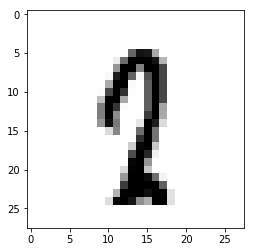

Prediction: 2.0
Actual: 5.0


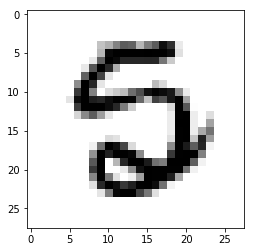

Prediction: 2.0
Actual: 5.0


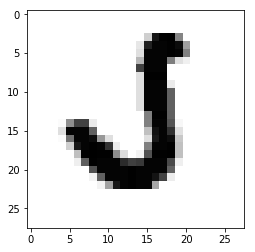

Prediction: 5.0
Actual: 2.0


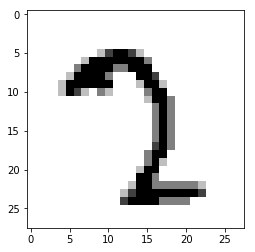

Prediction: 5.0
Actual: 2.0


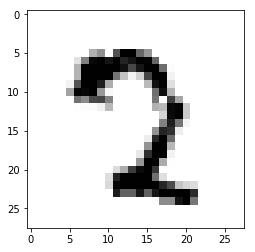

Prediction: 5.0
Actual: 2.0


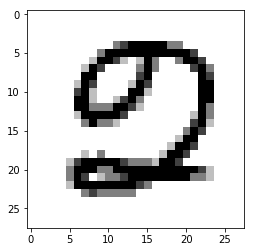

Prediction: 5.0
Actual: 2.0


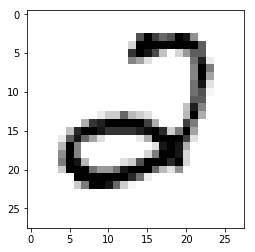

Prediction: 5.0
Actual: 2.0


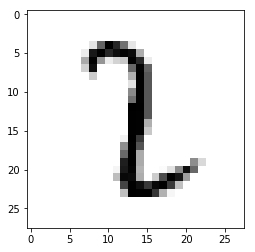

In [57]:
svm = SVC(C=1, gamma=1, kernel='poly').fit(X_train,y_train)
print("Accuracy on training subset: {:.2f}".format(svm.score(X_train, y_train)))
print("Accuracy on test subset: {:.2f}".format(svm.score(X_test, y_test)))
import matplotlib.pyplot as plt


misclassified = np.where(y_test != svm.predict(X_test))
misclassified = misclassified[0]
predictions = svm.predict(X_test)
for i in range(8):
    print("Prediction: "  + str(predictions[misclassified[i]]))
    print("Actual: " + str(y_test[misclassified[i]]))
    
    plt.imshow(X_test[misclassified[i]].reshape(28,28),cmap=plt.cm.gray_r)
    plt.show()


e) How do results (time and accuracy) change, depending on whether you consider
an 'easy' binary task (e.g. distinguishing '1' and '0') or a more difficult one (e.g. '4' vs. '5'). This exercise
requires you to make new datasets with different values for 'digit1' and 'digit2'.

### Multiclass classification

f) [Discussion only] Explain how a binary classifier, such as an SVM, can be applied to a multiclass classification problem, such as recognizing all 10 digits in the MNIST dataset.

g) From the binary classification exercise above, identify a good configuration that gives a reasonable combination
of accuracy and runtime. Use this configuration to perform a full classification of the 10 classes in the
original dataset. Report the accuracy obtained on the test data.

# Exercise 3: Regression with random forest

For this exercise we will be using the famous nycflights dataset.

So far, we have only considered how to use SVMs and decision trees (and, by extension, random forests) for classification. However, both algorithms can also be used for regression tasks, as we will see in the exercises below.

### Preprocessing

a) Load the data as a pandas dataframe and display the first 5 rows of the dataset. Remove the columns `'carrier'`,`'tailnum'`,`'flight'`,`'origin'`, and `'dest'`.

b) Plot the distributions for all variables (hint: use the `hist` method for the dataframe). Consider if you want to transform any of the variables, i.e. using a logarithmic transformation. Explain your choices.

c) Handle any nan-values in the dataset, and normalize all relevant variables. Are there any categorical variables? If so, create dummy variables for these.

d) In the following, we are going to determine which factors cause departure time delays, and try to predict the length of these delays. However, for several departures, a *negative* delay have been reported. How do you interpret a negative delay? Consider if you want to modify the negative delays in some way. 

### Regression analysis: Predicting departure time delays

e) Extract the features and the target variable (in this case the departure time delays) from the dataframe. Split the dataset into test and train sets (technically, we ought to have done this before preprocessing. For the sake of simplicity, we do not conform to this best practice in this exercise).

f) Train a decision tree regressor for predicting departure time delays (you might want to experiment with a few different values of the hyperparameters to avoid too much overfitting). Plot the tree, and explain how decision trees can be used for regression analyses.

g) Do a regression analysis as the one above, but using a random forest instead of a single decision tree. Use a grid-search to determine a good set of hyperparameters. When you have found the best model, score your model on the test set. Comment on the result. 

h) Plot the feature importances determined by the tree. Which feature is the most important? Do you have any idea as to why? Remove any features which cannot be used to predict departure time delays in any meaningful way, and redo the analysis. Comment on your results.

### Regression analysis: Predicting arrival time delays

In the last part of the exercise, we are going to try to predict arrival time delays as a function of departure time delays - it might be of interest to know how large a delay one should expect after the plane has departed from the airport. 

i) Train a decision tree or random forest regressor and an OLS to the dataset, and see how well arrival time delay. can be predicted based on departure time delay. 

j) Plot the arrival time delays as a function of the departure time delay, and show the predictions from each of the two regressors.

k) Based on the results obtained above, make a plot that extrapolates a little bit in order to predict delays slightly larger than the largest delay found in the dataset. Which model do you think gives the most trustworthy extrapolation? 

l) Hopefully you found that it is possible to predict arrival time delays quite confidently from departure time delays. See if you can improve these predictions by including some (or all) of the other features. You are encouraged to try out several different machine learning algorithms.